In [3]:
import math
import random
import csv
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def create_grid(row, col, deg1):
	grid = []
	csvFile = open("ATL_weather.csv", "r")
	reader = csv.reader(csvFile)
	temp_min = 10000
	temp_max = -10000
	humd_min = 10000
	humd_max = -10000
	winSp_min = 10000
	winSp_max = -10000
	alt_min = 10000
	alt_max = -10000
	for item in reader:
		if reader.line_num == 1:
			continue
		temp = float(item[1])
		humd = float(item[2])
		winSp = float(item[3])
		deg = float(item[4])
		alt = float(item[5])
		if temp < temp_min:
			temp_min = temp
		if temp > temp_max:
			temp_max = temp
		if humd < humd_min:
			humd_min = humd
		if humd > humd_max:
			humd_max = humd
		if winSp < winSp_min:
			winSp_min = winSp
		if winSp > winSp_max:
			winSp_max = winSp
		if alt < alt_min:
			alt_min = alt
		if alt > alt_max:
			alt_max = alt
		if deg1 is -1:
			deg = deg
		elif deg1 is -2:
			winSp = 0
		else:
			deg = deg1         
		attribute = {'Con': 2, 'Temp':temp, 'Humd':humd, 'WinSp':winSp, 'Alt':alt, 'ki':0, 'Degree':deg}
		grid.append(attribute)
	for item in grid:
		item['Temp'] = item['Temp'] / temp_max
		item['Humd'] = item['Humd'] / humd_max
		item['WinSp'] = item['WinSp'] / winSp_max
		item['Alt'] = item['Alt'] / alt_max
	grid[33]['ki'] = 8
	# grid[44]['ki'] = 8
	# grid[99]['ki'] = 8
	return grid

In [5]:
def update(grid, iteration, row, col):
	for k in range(iteration):
		for i in range(len(grid)):
			# 1.generation
			generation(grid, i)
			# 2.difussion
			difussion(grid, i, row, col)
			dilution(grid, i)
			deposition(grid, i)
			# state 
		

# def print_grid(grid, row, col):
# 	for i in range(row):
# 		for j in range(col):
# 			print(str(round(grid[i * col + j]['Con'], 4)) + '\t', end='')
# 		print('')

def generation(grid, i):
	attribute = grid[i]
	grid[i]['Con'] = attribute['Con'] + attribute['ki'] * (attribute['Temp'] * attribute['Humd'])

def difussion(grid, i, row, col):
	speedi = 0.15
	alt = grid[i]['Alt']
	temp = grid[i]['Temp']
	deg = grid[i]['Degree']
	# up
	if i - col >= 0:
		diff = (grid[i]['Con'] - grid[i - col]['Con']) * (alt * temp * 0.05)
		grid[i]['Con'] = grid[i]['Con'] - diff
		grid[i - col]['Con'] = grid[i - col]['Con'] + diff
		if math.sin(math.radians(deg - 90)) > 0:
			carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg - 90)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i - col]['Con'] = grid[i - col]['Con'] + carry
		else:
			carry = grid[i - col]['Con'] * grid[i - col]['WinSp'] * math.sin(math.radians(deg - 90)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i - col]['Con'] = grid[i - col]['Con'] + carry
	#down
	if i + col < col * row:
		diff = (grid[i]['Con'] - grid[i + col]['Con']) * (alt * temp * 0.05)
		grid[i]['Con'] = grid[i]['Con'] - diff
		grid[i + col]['Con'] = grid[i + col]['Con'] + diff
		if math.sin(math.radians(deg + 90)) > 0:
			carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg + 90)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i + col]['Con'] = grid[i + col]['Con'] + carry
		else:
			carry = grid[i + col]['Con'] * grid[i + col]['WinSp'] * math.sin(math.radians(deg + 90)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i + col]['Con'] = grid[i + col]['Con'] + carry

	#left
	if i % col != 0:
		diff = (grid[i]['Con'] - grid[i - 1]['Con']) * (alt * temp * 0.05)
		grid[i]['Con'] = grid[i]['Con'] - diff
		grid[i - 1]['Con'] = grid[i - 1]['Con'] + diff
		if math.sin(math.radians(deg)) > 0:
			carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i - 1]['Con'] = grid[i - 1]['Con'] + carry
		else:
			carry = grid[i - 1]['Con'] * grid[i - 1]['WinSp'] * math.sin(math.radians(deg)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i - 1]['Con'] = grid[i - 1]['Con'] + carry
		
		#left up
		if i - col >= 0:
			diff = (grid[i]['Con'] - grid[i - col -1]['Con']) * (alt * temp * 0.05)
			grid[i]['Con'] = grid[i]['Con'] - diff
			grid[i - col - 1]['Con'] = grid[i - col - 1]['Con'] + diff
			if math.sin(math.radians(deg - 45)) > 0:
				carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg - 45)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i - col - 1]['Con'] = grid[i - col - 1]['Con'] + carry
			else:
				carry = grid[i - col - 1]['Con'] * grid[i - col - 1]['WinSp'] * math.sin(math.radians(deg - 45)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i - col - 1]['Con'] = grid[i - col - 1]['Con'] + carry
		
		#left down
		if i + col < col * row:
			diff = (grid[i]['Con'] - grid[i + col -1]['Con']) * (alt * temp * 0.05)
			grid[i]['Con'] = grid[i]['Con'] - diff
			grid[i + col - 1]['Con'] = grid[i + col - 1]['Con'] + diff
			if math.sin(math.radians(deg + 45)) > 0:
				carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg + 45)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i + col - 1]['Con'] = grid[i + col - 1]['Con'] + carry
			else:
				carry = grid[i + col - 1]['Con'] * grid[i + col - 1]['WinSp'] * math.sin(math.radians(deg + 45)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i + col - 1]['Con'] = grid[i + col - 1]['Con'] + carry
	
	#right
	if (i + 1) % col != 0:
		diff = (grid[i]['Con'] - grid[i + 1]['Con']) * (alt * temp * 0.05)
		grid[i]['Con'] = grid[i]['Con'] - diff
		grid[i + 1]['Con'] = grid[i + 1]['Con'] + diff
		if math.sin(math.radians(deg + 180)) > 0:
			carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg + 180)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i + 1 ]['Con'] = grid[i + 1]['Con'] + carry
		else:
			carry = grid[i + 1]['Con'] * grid[i + 1]['WinSp'] * math.sin(math.radians(deg + 180)) * speedi
			grid[i]['Con'] = grid[i]['Con'] - carry
			grid[i + 1]['Con'] = grid[i + 1]['Con'] + carry
		
		#right up
		if i - col >= 0:
			diff = (grid[i]['Con'] - grid[i - col + 1]['Con']) * (alt * temp * 0.05)
			grid[i]['Con'] = grid[i]['Con'] - diff
			grid[i - col + 1]['Con'] = grid[i - col + 1]['Con'] + diff
			if math.sin(math.radians(deg - 135)) > 0:
				carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg - 135)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i - col + 1]['Con'] = grid[i - col + 1]['Con'] + carry
			else:
				carry = grid[i - col + 1]['Con'] * grid[i - col + 1]['WinSp'] * math.sin(math.radians(deg - 135)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i - col + 1]['Con'] = grid[i - col + 1]['Con'] + carry
		
		#right down
		if i + col < col * row:
			diff = (grid[i]['Con'] - grid[i + col + 1]['Con']) * (alt * temp * 0.05)
			grid[i]['Con'] = grid[i]['Con'] - diff
			grid[i + col + 1]['Con'] = grid[i + col + 1]['Con'] + diff
			if math.sin(math.radians(deg + 135)) > 0:
				carry = grid[i]['Con'] * grid[i]['WinSp'] * math.sin(math.radians(deg + 135)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i + col + 1]['Con'] = grid[i + col + 1]['Con'] + carry
			else:
				carry = grid[i + col + 1]['Con'] * grid[i + col + 1]['WinSp'] * math.sin(math.radians(deg + 135)) * speedi
				grid[i]['Con'] = grid[i]['Con'] - carry
				grid[i + col + 1]['Con'] = grid[i + col + 1]['Con'] + carry

def dilution(grid, i):
	grid[i]['Con'] = grid[i]['Con'] * (1 - 0.1 * grid[i]['Temp'] * grid[i]['WinSp'])

def deposition(grid, i):
	#precipitation
	grid[i]['Con'] = grid[i]['Con'] * (1 - 0.01)
	#green belt adsorbtion
	# grid[i]['Con'] = grid[i]['Con'] - 0.002 * random.randint(0,10)

def plot(grid, row, col):
	sns.set()
	uniform_data = numpy.zeros((row, col))
	#uniform_data1 = numpy.reshape(row, col)
	index = 0
	for i in range(row):
		for j in range(col):
			uniform_data[i][j] = grid[index]['Con']
			index = index + 1
	# print (uniform_data)
	#uniform_data = numpy.random.rand(10, 12)
	ax = sns.heatmap(uniform_data, fmt="d",cmap='YlGnBu')

	#ax = sns.heatmap(uniform_data)
	plt.show() 

In [6]:
map = create_grid(14,14, -1)

In [7]:
update(map, 100, 14, 14)

In [8]:
#print_grid(map, 14, 14)

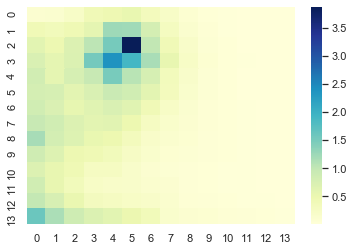

In [9]:
plot(map, 14, 14)

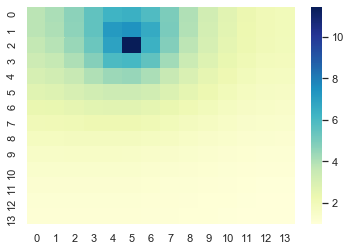

In [10]:
map = create_grid(14,14,-2)
update(map, 100, 14, 14)
#print_grid(map, 14, 14)
plot(map, 14, 14)

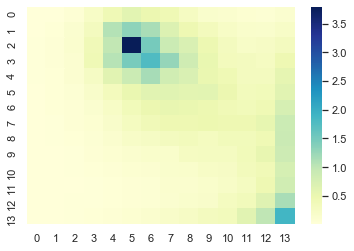

In [11]:
map = create_grid(14,14,315)
update(map, 100, 14, 14)
#print_grid(map, 14, 14)
plot(map, 14, 14)